# House Prices - Advanced Regression Techniques

Use the Ames Housing data set to predict sales prices and practice feature engineering, RFs, and gradient boosting.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## Read and Inspect Data

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

# Exploratory Data Analysis

## Missing Data

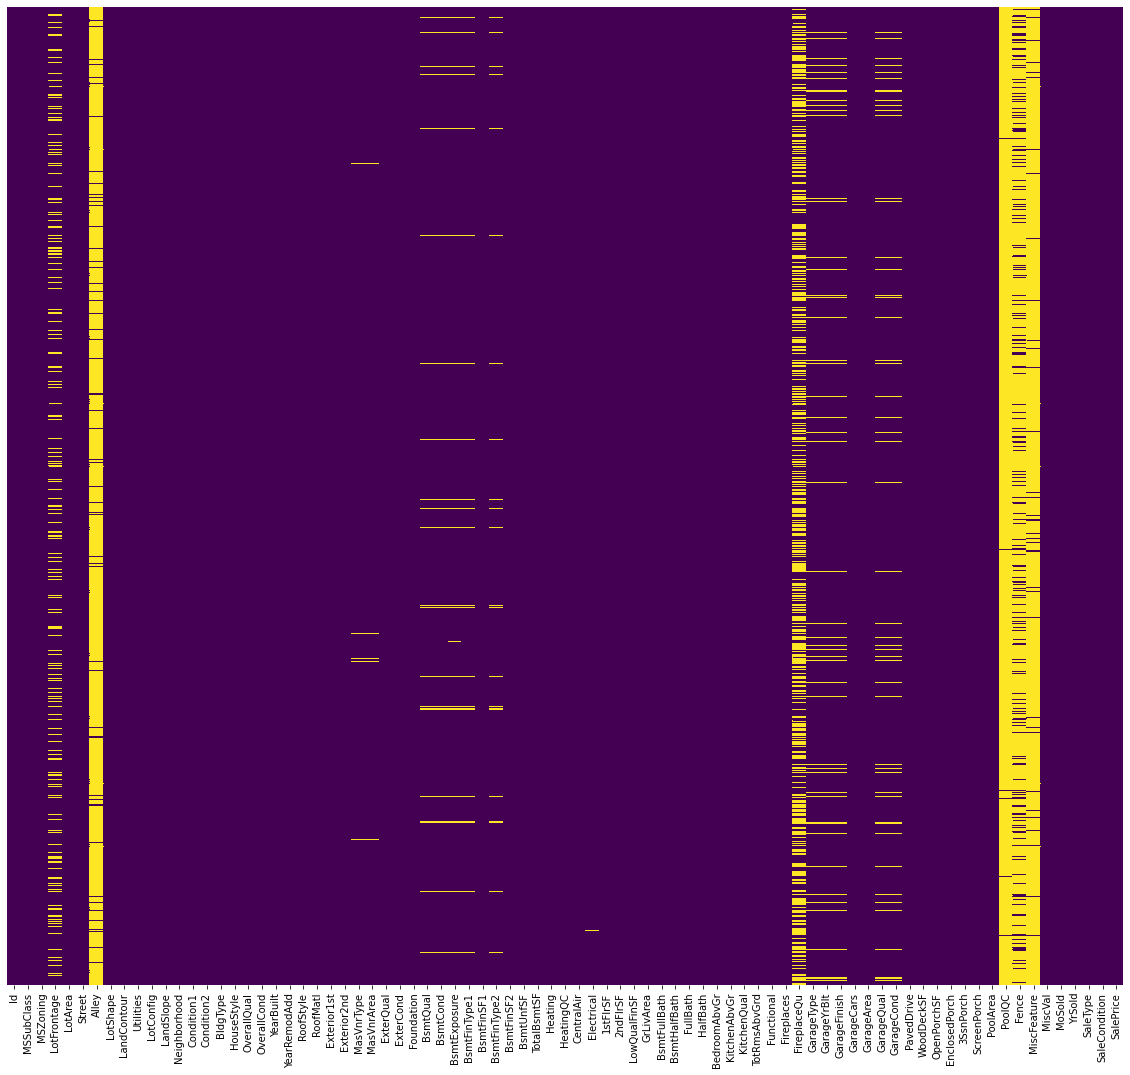

In [9]:
plt.figure(figsize=(20,18))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

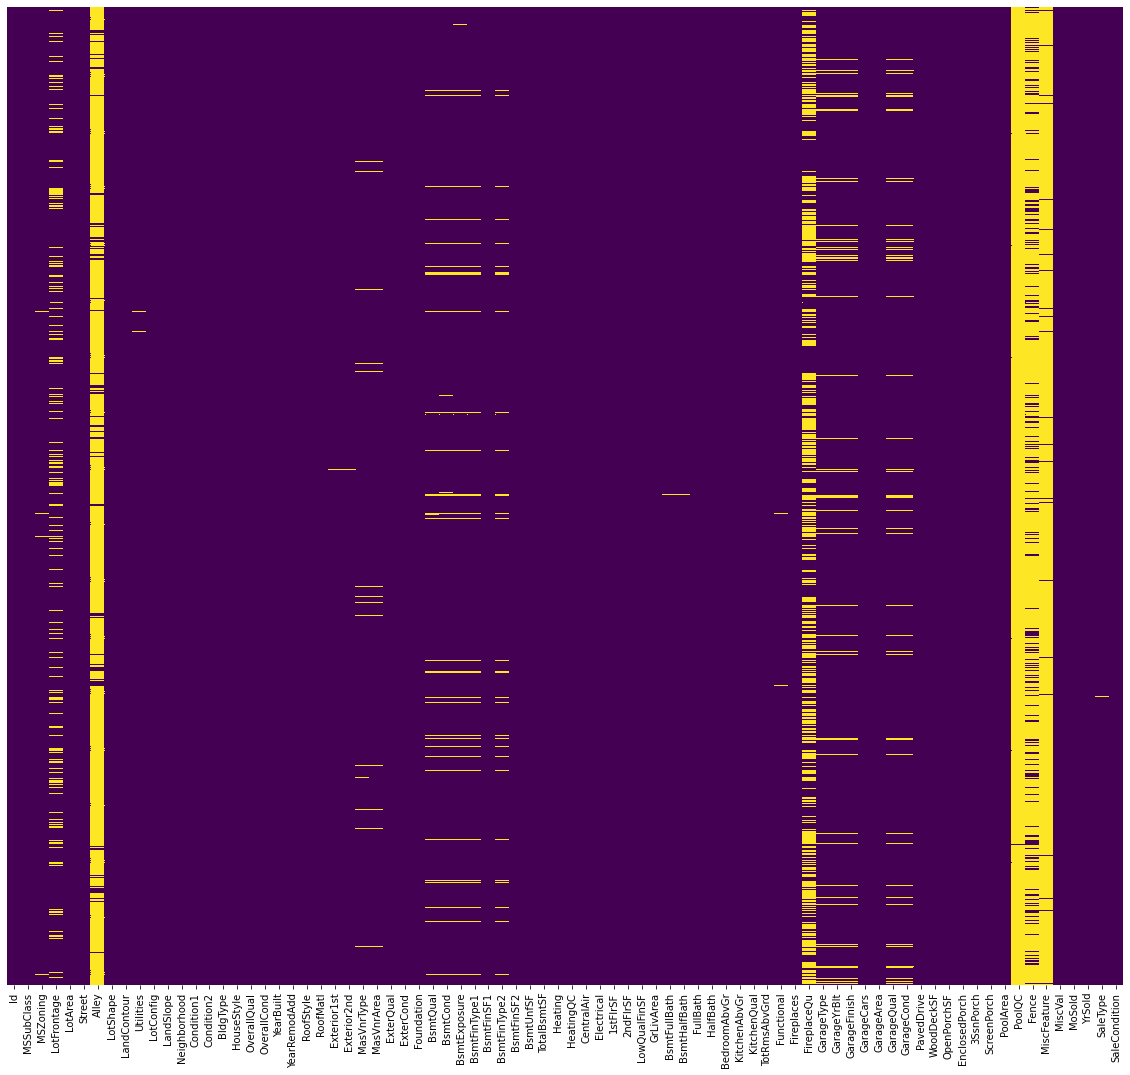

In [10]:
plt.figure(figsize=(20,18))
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

There are too many missing values in the columns **Alley, FireplaceQu, PoolQC, Fence, MiscFeature** to draw useful insights, so it's probably a better idea to drop them moving forward. 

In [11]:
train.drop(columns=['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)
test.drop(columns=['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

## Data Visualization

[Text(0.5, 1.0, '# Houses Sold by Year')]

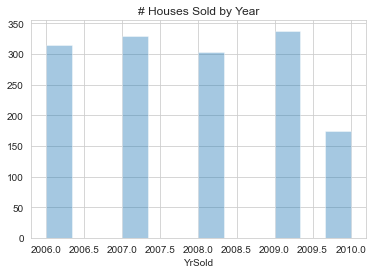

In [12]:
sns.set_style('whitegrid')
sns.distplot(train['YrSold'], kde=False).set(title='# Houses Sold by Year')

[Text(0.5, 1.0, '# Houses Sold by Month')]

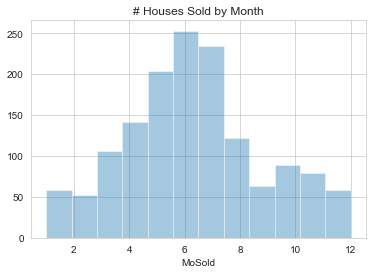

In [13]:
sns.distplot(train['MoSold'], kde=False, bins=12).set(title='# Houses Sold by Month')

[Text(0.5, 1.0, 'Median Sale Price by Year')]

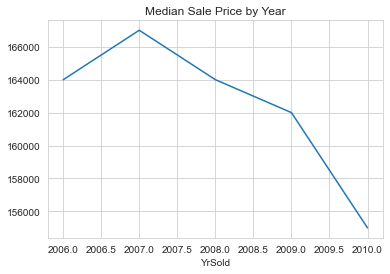

In [14]:
train.groupby('YrSold')['SalePrice'].median().plot().set(title='Median Sale Price by Year')

In [15]:
# Split features into categorical and numeric 
cat_train = [cat for cat in train.columns if train[cat].dtype == 'object']
num_train = [cat for cat in train.columns if train[cat].dtype == 'int64' or train[cat].dtype == 'float64']

cat_test = [cat for cat in test.columns if test[cat].dtype == 'object']
num_test = [cat for cat in test.columns if test[cat].dtype == 'int64' or test[cat].dtype == 'float64']

Visualize the relationship between categorical features and Sales Price to find out which features have the most influence on sales prices

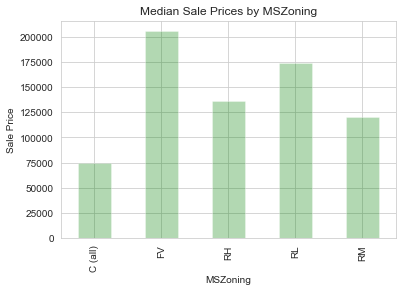

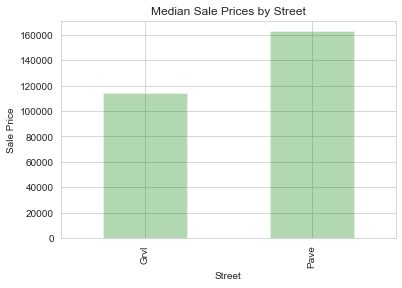

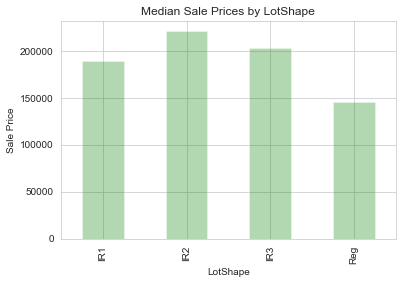

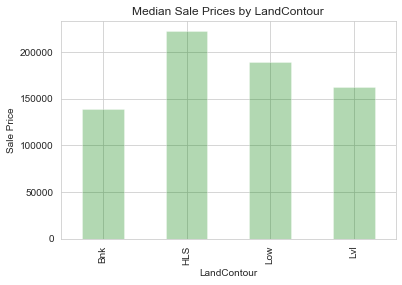

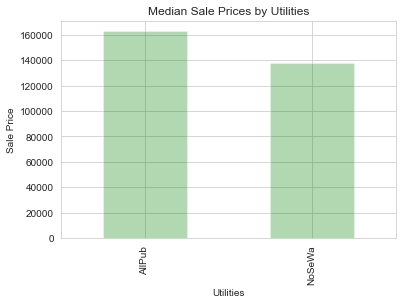

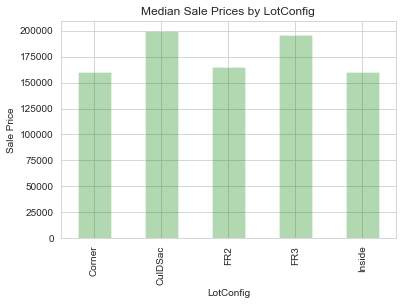

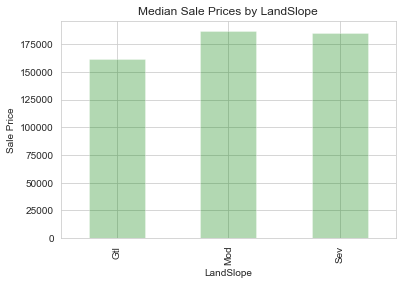

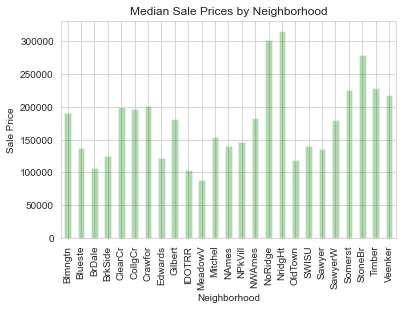

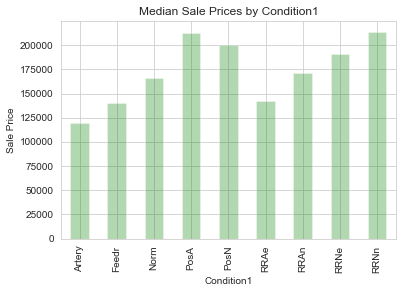

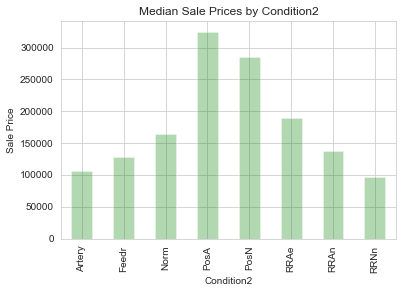

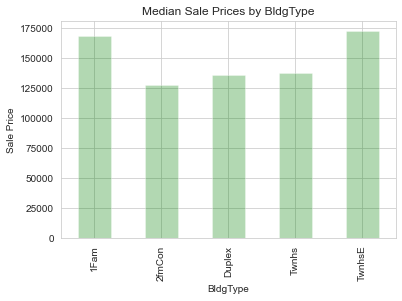

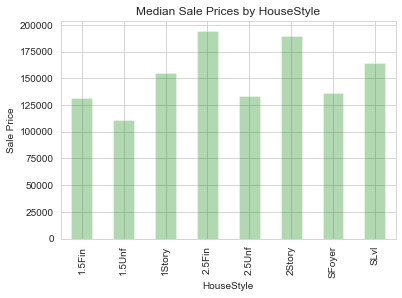

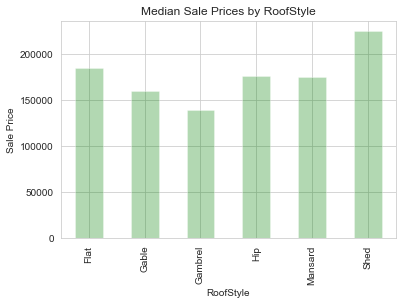

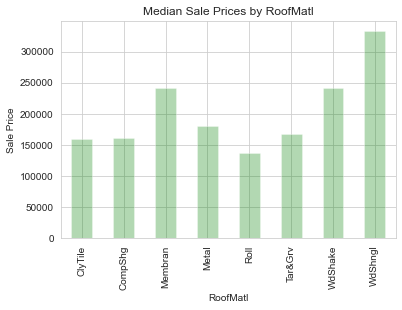

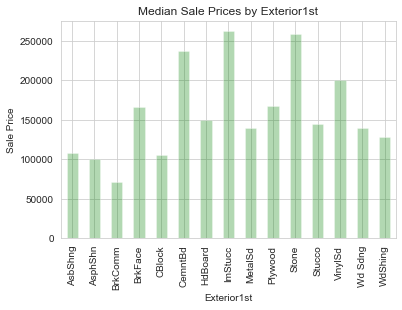

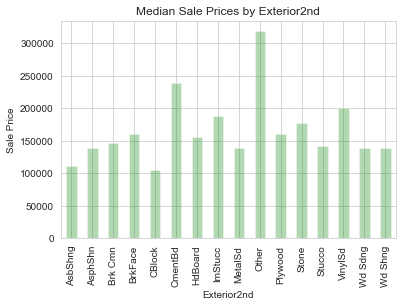

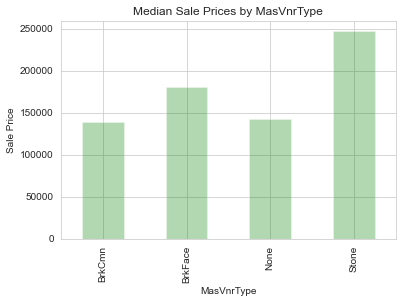

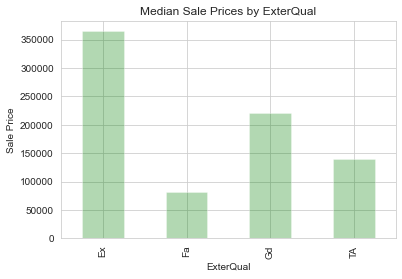

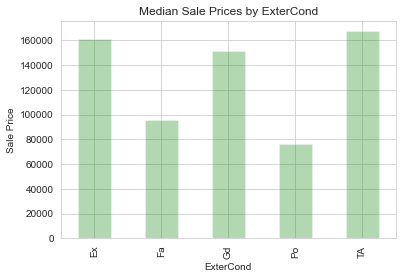

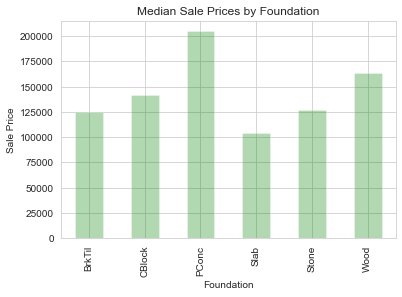

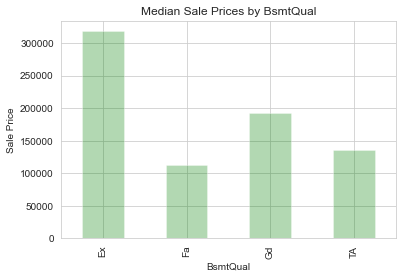

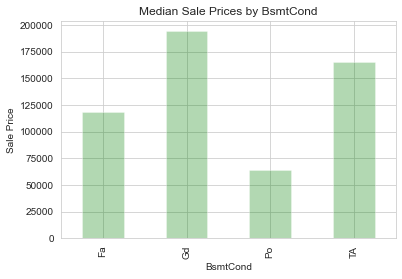

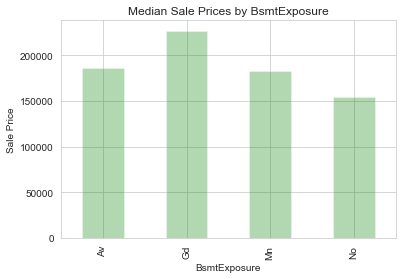

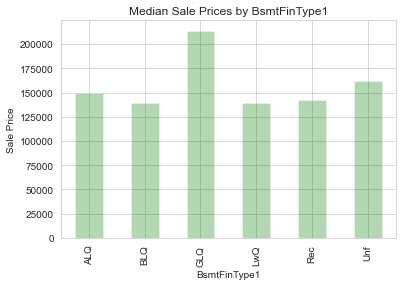

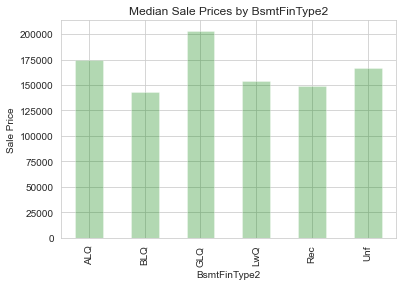

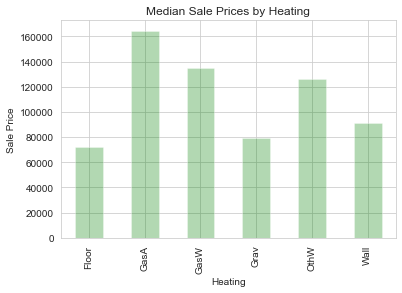

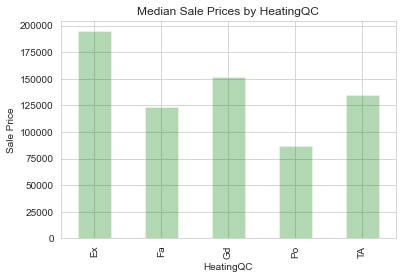

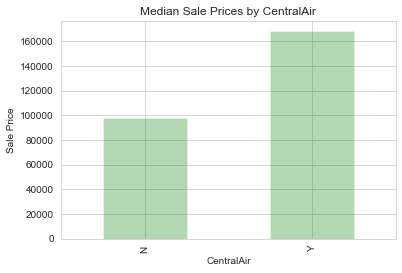

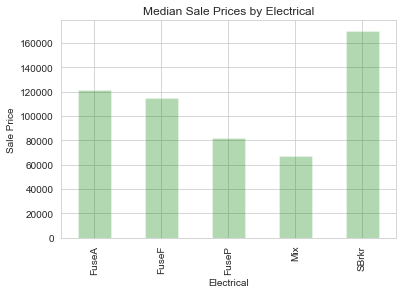

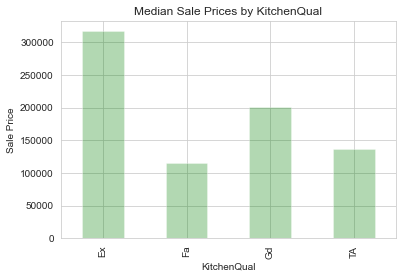

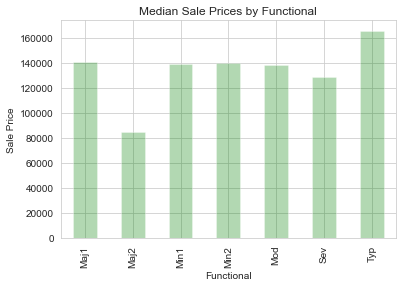

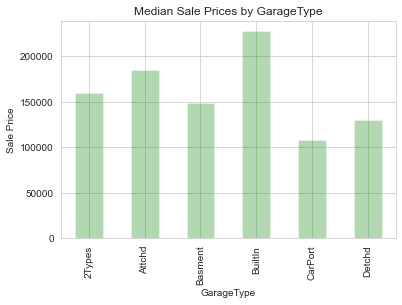

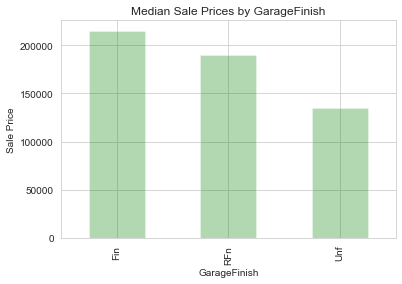

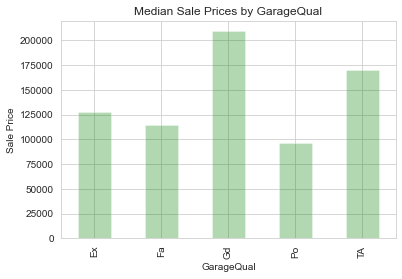

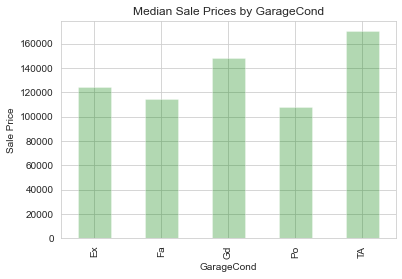

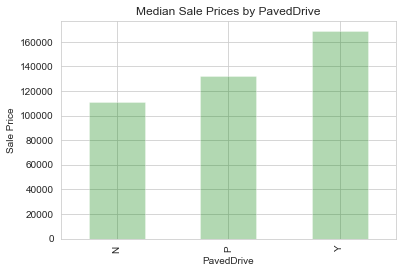

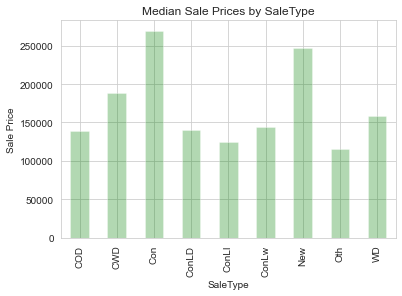

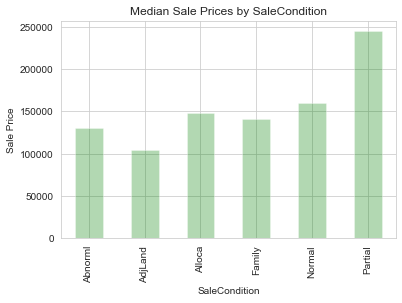

In [16]:
for feature in cat_train:
    data = train.copy()
    train.groupby(feature)['SalePrice'].median().plot.bar(color='green',alpha=0.3).set(title='Median Sale Prices by '+feature)
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.show()

Drop year or month features from the numeric features: 

In [17]:
to_rmv_features = ['YearBuilt', 'YearRemodAdd', 'MoSold', 'YrSold', 'Id', 'SalePrice']
num_train_wo_ym = [i for i in num_train if i not in to_rmv_features]

Visualize the relationship between numeric features and Sales Price using log transformation 

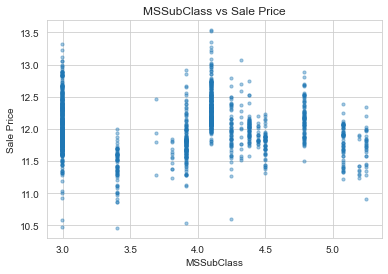

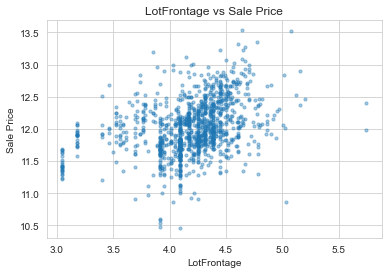

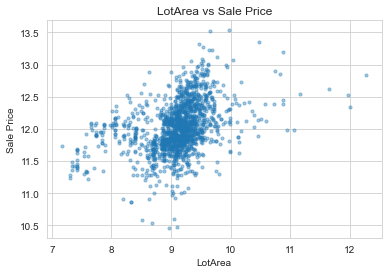

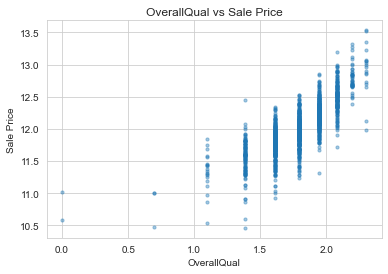

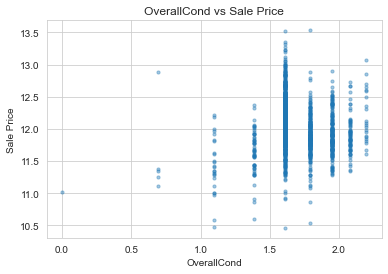

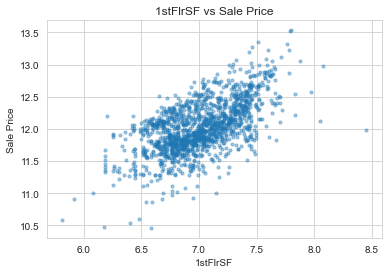

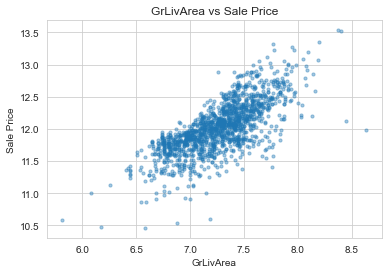

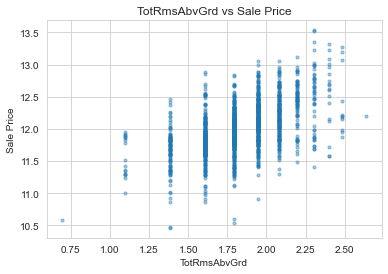

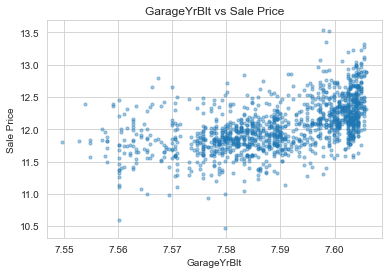

In [18]:
for feature in num_train_wo_ym:
    data = train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'], s=10, alpha=0.4)
        plt.xlabel(feature)
        plt.ylabel('Sale Price')
        plt.title(feature + ' vs Sale Price')
        plt.show()

# Data Cleaning

Method: Fill in missing values with mean if it's numeric features and fill in with the most common value if categorical.

In [19]:
train_na_cols = train.columns[train.isnull().any()].tolist()
test_na_cols = test.columns[test.isnull().any()].tolist()

In [20]:
for col in train_na_cols:
    if col in num_train:
        train[col] = train[col].fillna(train[col].mean())
    else:
        train[col] = train[col].fillna(train[col].mode()[0])

In [21]:
for col in test_na_cols:
    if col in num_test:
        test[col] = test[col].fillna(test[col].mean())
    else:
        test[col] = test[col].fillna(test[col].mode()[0])

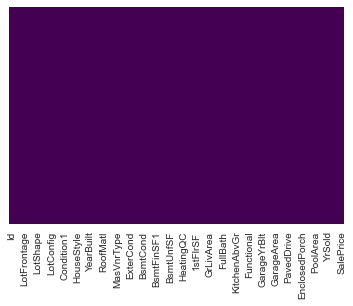

In [22]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

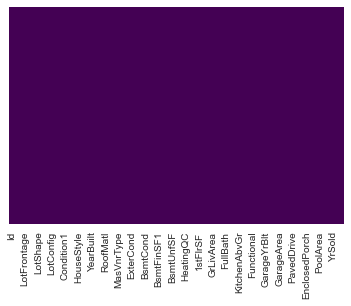

In [23]:
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Convert Categorical Features

Create dummy variables for categorical features and concatenate the original data sets with dummies

In [24]:
train_dummies = pd.get_dummies(train, columns=cat_train, drop_first=True)
test_dummies = pd.get_dummies(test, columns=cat_test, drop_first=True)

In [25]:
train = pd.concat([train.drop(cat_train, axis=1), train_dummies], axis=1)
test = pd.concat([test.drop(cat_test, axis=1), test_dummies], axis=1)

In [26]:
train = train.loc[:,~train.columns.duplicated()]
test = test.loc[:,~test.columns.duplicated()]

In [27]:
train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0


In [28]:
test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,0,1,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,0,1,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,0,1,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,0,0,1,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,0,0,1,0,0,0,1,0


# Build the Model

In [29]:
y_train = train['SalePrice']

X_train = train.drop('SalePrice', axis=1)
X_test = test

The test data set has less features than the train data set, so we will add the missing columns in the test data set with default values to 0

In [30]:
missing_cols = set(train.drop('SalePrice', axis=1).columns) - set(test.columns)

for c in missing_cols:
    X_test[c] = 0
X_test = X_test[X_train.columns]

# Training and Predicting

In [44]:
from sklearn.ensemble import GradientBoostingRegressor

In [45]:
model = GradientBoostingRegressor()

In [46]:
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [47]:
predictions = model.predict(X_test)

In [48]:
predictions

array([119561.97069678, 163225.43888533, 175193.66920722, ...,
       171406.60499482, 119257.11932904, 242599.44601682])

# Create CSV for Submission

In [49]:
submission = pd.DataFrame({'Id':X_test['Id'], 'SalePrice':predictions})
submission.head()

,Id,SalePrice
0,1461,119561.970697
1,1462,163225.438885
2,1463,175193.669207
3,1464,181730.779952
4,1465,196215.592086


In [50]:
submission.to_csv('Submission_XGBoost_pred.csv', index=False)

In [51]:
submission.tail()

,Id,SalePrice
1454,2915,82678.191466
1455,2916,84680.624169
1456,2917,171406.604995
1457,2918,119257.119329
1458,2919,242599.446017
